In [2]:
import pandas as pd
import numpy as np
import re
import os
from argparse import Namespace
from tqdm.notebook import tqdm
import seaborn as sns

In [3]:
args = Namespace(
    rawCSV = "roi_data.csv",
    contextual_data = "context.json",
    modifiedCSV = "roi_data_new.csv",
)

In [4]:
def sortFunc(e):
    return len(e[1])

In [5]:
df = pd.read_csv(args.modifiedCSV)
df["roi"]=df.apply(lambda x: int(x["conversion_roi"])+1 if x["conversion_roi"]>0 else 0,axis=1)
df["unique"] = df.index

In [6]:
df[df.apply(lambda x:x["conversion_roi"]==0, axis =1)].shape,df[df.apply(lambda x:x["conversion_roi"]>0, axis =1)].shape,df.shape

((1326194, 43), (56668, 43), (1382862, 43))

In [6]:
table = pd.pivot_table(df, values='unique', index=["roi"],aggfunc='count')
print(table)

      unique
roi         
0    1326194
1      47492
2       7040
3       1429
4        485
5        222


In [64]:
conf_matrix = pd.crosstab(df['hour'],df['day_part'])
conf_matrix.to_

day_part,0,1,2,3
hour,,,,
00,373,0,18283,53093
01,410,19,13202,59058
02,358,26,474,71506
03,336,29,401,69427
04,272,21,0,66154
05,265,42,1,54062
06,116,32,0,28332
07,80,11,9,19892
08,3,2,13,995


In [63]:
df.columns

Index(['mm_auction_id', 'imp_timestamp', 'impression_date', 'day_of_week',
       'day_part', 'exchange_id', 'publisher_id', 'site_id', 'size',
       'creative_id', 'country_id', 'region_id', 'dma_id', 'conn_speed',
       'isp_id', 'category_id', 'deal_id', 'fold_position', 'browser_id',
       'os_id', 'browser_language_id', 'channel_type',
       'overlapped_brain_pixel_selections', 'hashed_app_id', 'id_vintage',
       'device_id', 'browser', 'browser_version', 'os', 'os_version',
       'device_model', 'device_manufacturer', 'device_type',
       'viewability_autotag', 'cross_device_flag', 'exchange_viewability_rate',
       'exchange_ctr', 'exchange_vcr', 'base_domain', 'num_device_ids',
       'conversion_roi', 'roi', 'unique', 'hour'],
      dtype='object')

In [62]:
df["hour"]=df.apply(lambda x: x['imp_timestamp'].split(" ")[1].split(":")[0],axis=1)

In [8]:
for file in files:
    if re.match("context_\d",file):
        os.remove(file)

In [5]:
nameList = [(name,list(df[name].unique())) for name in df.columns]
nameList.sort(reverse=True, key=sortFunc)

In [15]:
dictResult = {}
dictResult["FieldName"] = list(df.columns)+["RowCount"]
roiThreshold = 0.5
for roi in tqdm(range(7), desc='Generate row summary of ROI'):
    if roi==6:
        dfTemp = df
        colname = "roi all"
    else:
        dfTemp = df[df.apply(lambda x: (x["roi"]<roi+roiThreshold) and (x["roi"]>roi-roiThreshold), axis=1)]
        colname = "roi={}".format(roi)
    dictResult[colname]= [dfTemp[name].unique().shape[0] for name in df.columns]+[dfTemp.shape[0]]
dfSummary = pd.DataFrame.from_dict(dictResult)

Generate row summary of ROI:   0%|          | 0/7 [00:00<?, ?it/s]

In [17]:
positiveRoi = df[df.apply(lambda x:x["roi"]>0,axis=1)]
zeroRoi = df[df.apply(lambda x:x["roi"]==0,axis=1)]

In [18]:

for domain in ["salary.com","msn.com"]:
    t0=zeroRoi[zeroRoi.apply(lambda x:x["base_domain"]==domain,axis=1)]
    t1=positiveRoi[positiveRoi.apply(lambda x:x["base_domain"]==domain and x["roi"]>0,axis=1)]
    print (domain,t1["roi"].sum()/t1.shape[0],t0.shape[0]/zeroRoi.shape[0],t1.shape[0]/positiveRoi.shape[0])

salary.com 1.2075471698113207 0.0006643070320028593 0.0009352721112444413
msn.com 1.2008238928939239 0.0141623322078067 0.0171348909437425


In [19]:
df["imp_timestamp"].unique()

array(['2022-11-22 01:56:23', '2022-11-22 13:40:53',
       '2022-11-22 17:42:37', ..., '2022-12-05 06:13:27',
       '2022-12-05 15:18:11', '2022-12-05 05:43:46'], dtype=object)

In [37]:
a=list(df["overlapped_brain_pixel_selections"].unique())
pixelTemp = None
names = [[float(i.split(":")[2]),float(i.split(":")[3])] for i in a[1:]]
pixelTemp = pd.DataFrame(names,columns=["frequency","recency"])
pixelTemp

,frequency,recency
0,8786.0,1.0
1,66552.0,1.0
2,79681.0,1.0
3,14668.0,3.0
4,92107.0,1.0
...,...,...
166164,313180.0,1.0
166165,24987.0,2.0
166166,4332.0,13.0
166167,9478.0,2.0


In [43]:
for i in range(6):
    print(i,df[df.apply(lambda x:(x["overlapped_brain_pixel_selections"]=="nulls") and (x["roi"]==i),axis=1)].shape[0])

0 1116681
1 7373
2 1511
3 400
4 158
5 55


In [44]:
for i in range(6):
    print(i,df[df.apply(lambda x: (x["roi"]==i),axis=1)].shape[0])

0 1363729
1 14994
2 2956
3 767
4 319
5 97


In [41]:
df["overlapped_brain_pixel_selections"].describe()

count     1382862
unique     166170
top         nulls
freq      1126178
Name: overlapped_brain_pixel_selections, dtype: object

In [38]:
pixelTemp.describe()

,frequency,recency
count,1.661690e+05,166169.000000
mean,1.940146e+06,3.103244
std,7.005628e+06,4.838888
min,0.000000e+00,1.000000
25%,1.125500e+04,1.000000
50%,3.310800e+04,1.000000
75%,8.172100e+04,3.000000
max,2.783807e+07,114.000000


['nulls']

In [27]:
len(a)

166170

In [51]:
result = dfSummary.sort_values(by=["roi={}".format(i) for i in range(6)], ascending=False)
print(result.to_string())
result.to_clipboard()

                            FieldName    roi=0  roi=1  roi=2  roi=3  roi=4  roi=5  roi all
42                             unique  1363729  14994   2956    767    319     97  1382862
0                       mm_auction_id  1355952  14982   2956    767    319     97  1371261
1                       imp_timestamp   725967  14852   2951    766    319     97   730305
22  overlapped_brain_pixel_selections   162793   7450   1437    368    162     43   166170
36                       exchange_ctr    66400   1240    246     52     20     11    66951
7                             site_id    34710   3353   1125    408    181     67    34900
38                        base_domain    16035   2348    901    342    170     63    16120
6                        publisher_id     9440   1808    749    319    155     68     9492
23                      hashed_app_id     3849    483    143     43     14     11     3873
40                     conversion_roi     2422   3106   1461    563    274     83     7909

In [57]:
table = pd.pivot_table(df, values='unique', index=["site_id","base_domain"],aggfunc='count')
print(table)

                                unique
site_id     base_domain               
-2137259393 jetnation.com            1
-2126744109 techradar.com            3
-2123075450 nwitimes.com             1
-2110315280 salary.com               1
-2100762512 sportsbrief.com          1
...                                ...
 2146787860 trendbihar.com           1
 2146930688 scrillap.com             1
 2147040911 formodernkids.com        1
 2147083469 thegirlonbloor.com      26
 2147429265 blogspot.com             7

[75312 rows x 1 columns]


In [5]:
table = pd.pivot_table(df, values='unique', index=["roi"],aggfunc='count')
print(table)

      unique
roi         
0    1363729
1      14994
2       2956
3        767
4        319
5         97


In [57]:
table = pd.pivot_table(df, values='unique', index=["site_id","base_domain"],aggfunc='count')
print(table)

                                unique
site_id     base_domain               
-2137259393 jetnation.com            1
-2126744109 techradar.com            3
-2123075450 nwitimes.com             1
-2110315280 salary.com               1
-2100762512 sportsbrief.com          1
...                                ...
 2146787860 trendbihar.com           1
 2146930688 scrillap.com             1
 2147040911 formodernkids.com        1
 2147083469 thegirlonbloor.com      26
 2147429265 blogspot.com             7

[75312 rows x 1 columns]


In [20]:
conf_matrix = pd.crosstab(df['browser'],df['browser_id'])
conf_matrix

browser_id,40000,40001,40002,40003,40004,40005,40012,40013,40014,40015,80212
browser,,,,,,,,,,,
br_AOLShieldbrowser,0,0,0,69,0,0,0,0,0,0,1
br_AlohaBrowser,0,1,0,0,0,0,0,0,0,0,0
br_AmazonSilkBrowser,0,4225,0,0,0,0,0,0,0,0,370
br_AndroidWebkit,0,6,0,0,0,0,0,0,0,0,0
br_AvastSecureBrowser,0,1,0,0,0,0,0,0,0,0,0
br_Chrome,0,0,0,0,0,0,0,0,0,0,472371
br_ChromeMobile,56,0,0,0,0,0,0,0,0,0,244761
br_ChromeMobileoniOS,0,0,0,0,0,0,0,0,0,0,10509
br_Chromium,26,54,0,0,0,0,0,0,0,0,8


In [19]:
conf_matrix = pd.crosstab(df['device_id'],df['device_type'])
conf_matrix

device_type,fo_Desktop,fo_FeaturePhone,fo_Smartphone,fo_Tablet
device_id,,,,
40999,2571,2,0,0
41000,0,414897,308941,1791
42000,0,33,12,53452
43000,598868,2,0,0
46000,0,0,1,18


In [21]:
conf_matrix = pd.crosstab(df['os_id'],df['os'])
conf_matrix

os,os_Android,os_ChromeOS,os_FireOS,os_IntelMacOSX,os_KaiOS,os_Linux,os_MacOSX,os_Tizen,os_Windows,os_iOS,os_macOS
os_id,,,,,,,,,,,
40006,0,2571,0,0,1,0,0,0,0,0,0
40007,0,31105,0,11,0,0,0,0,0,0,0
40008,0,0,0,1,0,0,2235,0,0,0,123537
40009,548818,0,9748,0,4,1,0,32,3,220538,0
40010,0,0,0,0,0,0,0,0,440051,0,0
40011,0,0,0,0,0,1894,0,2,0,0,0


In [47]:
conf_matrix = pd.crosstab(df['device_model'],df['device_manufacturer'])
data2d = conf_matrix.to_numpy()
data2d=np.repeat(data2d,30,axis=1)
conf_matrix

device_manufacturer,ma_AT&T,ma_Acer,ma_Alcatel,ma_Amazon,ma_Apple,ma_Asus,ma_Axia,ma_BLU,ma_BarnesandNoble,ma_Beista,...,ma_Verizon,ma_Vivo,ma_Vsmart,ma_Wiko,ma_Winnovo,ma_Xiaomi,ma_ZTE,ma_Zonko,ma_eTalk,ma_itel
device_model,,,,,,,,,,,,,,,,,,,,,
ma_AT&T:mo_Calypso,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ma_AT&T:mo_EmblemRadiant,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ma_AT&T:mo_Maestro,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ma_AT&T:mo_MaestroPlus,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ma_AT&T:mo_Primetime,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ma_ZTE:mo_Zpad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,21,0,0,0
ma_ZTE:mo_nubiaRedMagic5G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ma_Zonko:mo_K118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


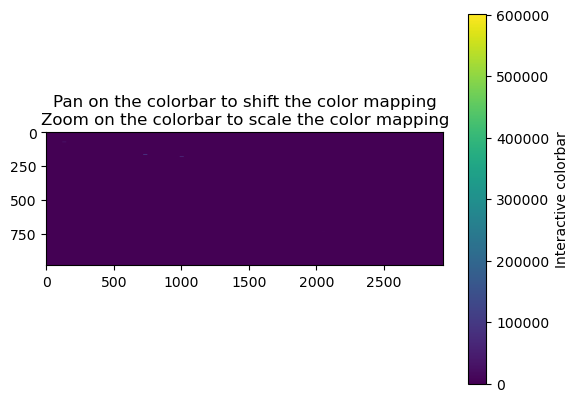

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

im = ax.imshow(data2d)
ax.set_title('Pan on the colorbar to shift the color mapping\n'
             'Zoom on the colorbar to scale the color mapping')

fig.colorbar(im, ax=ax, label='Interactive colorbar')

plt.show()

In [53]:
result = dfSummary.sort_values(by="FieldName")
print(result.to_string())
result.to_clipboard()

                            FieldName    roi=0  roi=1  roi=2  roi=3  roi=4  roi=5  roi all
38                        base_domain    16035   2348    901    342    170     63    16120
26                            browser       33     20     15     11     11     10       33
18                         browser_id       11     11     11      9      9      9       11
20                browser_language_id       66     21     10      5      3      3       66
27                    browser_version      626    209    103     59     40     18      626
15                        category_id      327    159    112     76     49     29      327
21                       channel_type        3      3      3      3      3      3        3
13                         conn_speed        3      2      2      1      1      1        3
40                     conversion_roi     2422   3106   1461    563    274     83     7909
10                         country_id        2      2      2      2      2      2        2

In [53]:
df2=df[df.apply(lambda x: x["roi"]==4,axis=1)]
conf_matrix = pd.crosstab(df2['site_id'],df2['base_domain'])
conf_matrix

base_domain,100krecipes.com,247mirror.com,aol.com,atv.com,aubtu.biz,audacy.com,azcentral.com,bamsmackpow.com,blackpeoplemeet.com,boston.com,...,wikihow.com,worldofsolitaire.com,wusa9.com,xfinity.com,yahoo.com,yourdiy.com,zacks.com,zap2it.com,zillow.com,zoosk.com
site_id,,,,,,,,,,,,,,,,,,,,,
7477,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004710808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2056105609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2057005419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
conf_matrix.to_clipboard()

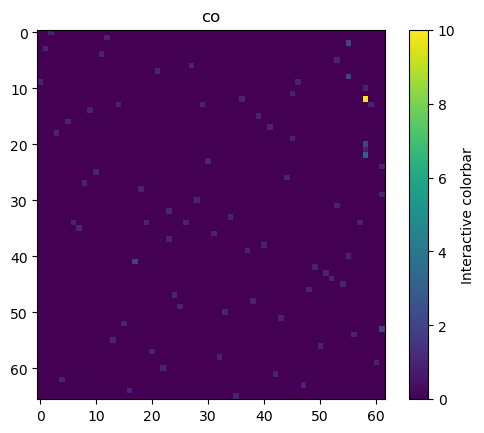

In [51]:
fig, ax = plt.subplots()

im = ax.imshow(conf_matrix.to_numpy())
ax.set_title('co')

fig.colorbar(im, ax=ax, label='Interactive colorbar')

plt.show()

In [21]:
for i in range(17,42,1):
    fieldName = nameList[i][0]
    table = pd.pivot_table(df, values='mm_auction_id', index=[fieldName],aggfunc='count')
    print(table.to_string())

                     mm_auction_id
browser_language_id               
0                           335573
24931                           71
24932                            4
24934                           10
24935                            2
24937                            1
24938                          303
24939                           12
24940                           14
24944                            3
24948                           25
25198                            5
25703                            1
25705                           32
25956                           87
25960                           36
25972                           24
26209                            2
26466                            6
26473                            3
26740                           22
26746                         2347
26982                            6
26984                           13
26995                            1
26998                          151
27489               

In [43]:
roi = 4
dfTemp = df[df.apply(lambda x: (x["roi"]<roi+0.5) and (x["roi"]>roi-0.5), axis=1)]
list(dfTemp["base_domain"].unique())

['fandom.com',
 'punchbowl.com',
 'insider.com',
 'signupgenius.com',
 'nba.com',
 'yahoo.com',
 'aol.com',
 'everydaymonkey.com',
 nan,
 'cosmopolitan.com',
 'zoosk.com',
 'weather.com',
 'laylita.com',
 'zillow.com',
 'tastyarea.com',
 'upworthy.com',
 'skinnyandtasty.com',
 'hollywoodlife.com',
 'wusa9.com',
 'heraldweekly.com',
 'rent.com',
 'travado.net',
 'parentmood.com',
 '247mirror.com',
 'tomshardware.com',
 'thesaurus.com',
 'quizlet.com',
 'tigernet.com',
 'inspiredtaste.net',
 'picrew.me',
 'hourdetroit.com',
 'nj.com',
 'xfinity.com',
 'realtor.com',
 'prensalibre.com',
 'hipporeport.com',
 'thesun.co.uk',
 'greatschools.org',
 'hebbarskitchen.com',
 'daily-choices.com',
 'etonline.com',
 'azcentral.com',
 'thekrazycouponlady.com',
 'dailymail.co.uk',
 'carsandyachts.com',
 'huaren.us',
 'wattpad.com',
 'aubtu.biz',
 'wcvb.com',
 'spotify.com',
 'cheezburger.com',
 'thecozycook.com',
 'zacks.com',
 'giantfreakinrobot.com',
 'theecofeed.com',
 'footwearnews.com',
 'tutoria

<AxesSubplot:xlabel='roi', ylabel='Count'>

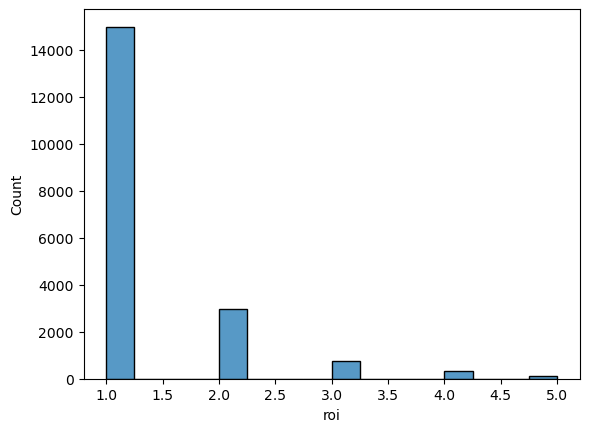

In [5]:
sns.histplot(data=dfSub, x="roi")